In [119]:
cd website

/Users/ReddingSkinnyRobot/Galvanize/coffee_filter/website


In [31]:
import pandas as pd
import numpy as np
from numpy.linalg import svd, eig
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import cm
%matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')

In [50]:
from recommender_model import *
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point

In [120]:
df = pd.read_csv('../data/df_with_features.csv', index_col=0)
mapping_df = pd.read_csv('../data/mapping_df.csv', index_col=0)

In [10]:
f1 = (0.5, 'Lovely ambiance')
f2 = (0, 'Nice for studying and working')
f3 = (0.2, 'High end coffee')
lat, lng = 47.612133, -122.335908

In [11]:
model = RecommenderModel(df, mapping_df)

In [12]:
recs = model.recommend(f1, f2, f3, lat, lng, r=1).to_dict('records')

/Users/ReddingSkinnyRobot/Galvanize/coffee_filter/website/recommender_model.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  / normalizing_weight)
/Users/ReddingSkinnyRobot/Galvanize/coffee_filter/website/recommender_model.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  axis=1)


In [13]:
df = model.df

In [14]:
mapped_df = model.mapped_df

In [93]:
mapped_df.columns

Index(['name', 'lat', 'lng', 'address', 'shop_id', 'Fun for families',
       'Nice for studying and working', 'Lovely ambiance',
       'Hidden neighborhood spot', 'Tasty pastries', 'Nightlife',
       'Exceptional service', 'High end coffee', 'Breakfast bites',
       'Quick in and out', 'Perfect for people watching', 'Cozy and comfy',
       'Lunch and snacks', 'Bustling and busy', 'distance_from_location'],
      dtype='object')

In [17]:
cd ..

/Users/ReddingSkinnyRobot/Galvanize/coffee_filter


In [23]:
seattle = gpd.GeoDataFrame.from_file('data/Neighborhoods/WGS84/Neighborhoods.shp')

In [53]:
type(seattle)

geopandas.geodataframe.GeoDataFrame

In [57]:
seattle_points = df[['lng', 'lat']].apply(lambda row: Point(row['lng'], row['lat']), axis=1)
geo_seattle_points = gpd.GeoDataFrame({'geometry':seattle_points,
                                      'names':df['name']})
geo_seattle_points.crs = {'init': 'epsg:4326'}

In [176]:
plotting_df.describe()

,Fun for families,Nice for studying and working,Lovely ambiance,Hidden neighborhood spot,Tasty pastries,Nightlife,Exceptional service,High end coffee,Breakfast bites,Quick in and out,Perfect for people watching,Cozy and comfy,Lunch and snacks,Bustling and busy
count,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000
mean,0.021512,0.033679,0.058590,0.051819,0.049699,0.015512,0.060600,0.075761,0.085020,0.017954,0.035706,0.009047,0.050395,0.018450
std,0.036410,0.037956,0.053758,0.063104,0.063706,0.045254,0.063408,0.084264,0.113263,0.025575,0.027727,0.010613,0.084255,0.029542
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.126331,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.028457
25%,0.001297,0.006741,0.022878,0.006185,0.006888,0.000000,0.017377,0.015329,0.006519,0.001149,0.013568,0.000259,0.003392,0.000228
50%,0.009568,0.018694,0.046219,0.030927,0.026089,0.000000,0.055290,0.045513,0.034004,0.007912,0.031553,0.005767,0.017219,0.007362
75%,0.026340,0.047755,0.082696,0.075412,0.063889,0.008035,0.098018,0.105574,0.115574,0.025750,0.050870,0.013848,0.052971,0.023421
max,0.283836,0.218760,0.416036,0.350933,0.471268,0.392407,0.281586,0.458595,0.492859,0.166574,0.155990,0.064777,0.516191,0.195993


In [125]:
W = df.drop(['name', 'lat', 'lng', 'address', 'shop_id'], axis=1)
mapping_df_columns = mapping_df.columns
plotting_df = pd.DataFrame(np.dot(W,mapping_df),
                               columns = mapping_df_columns)

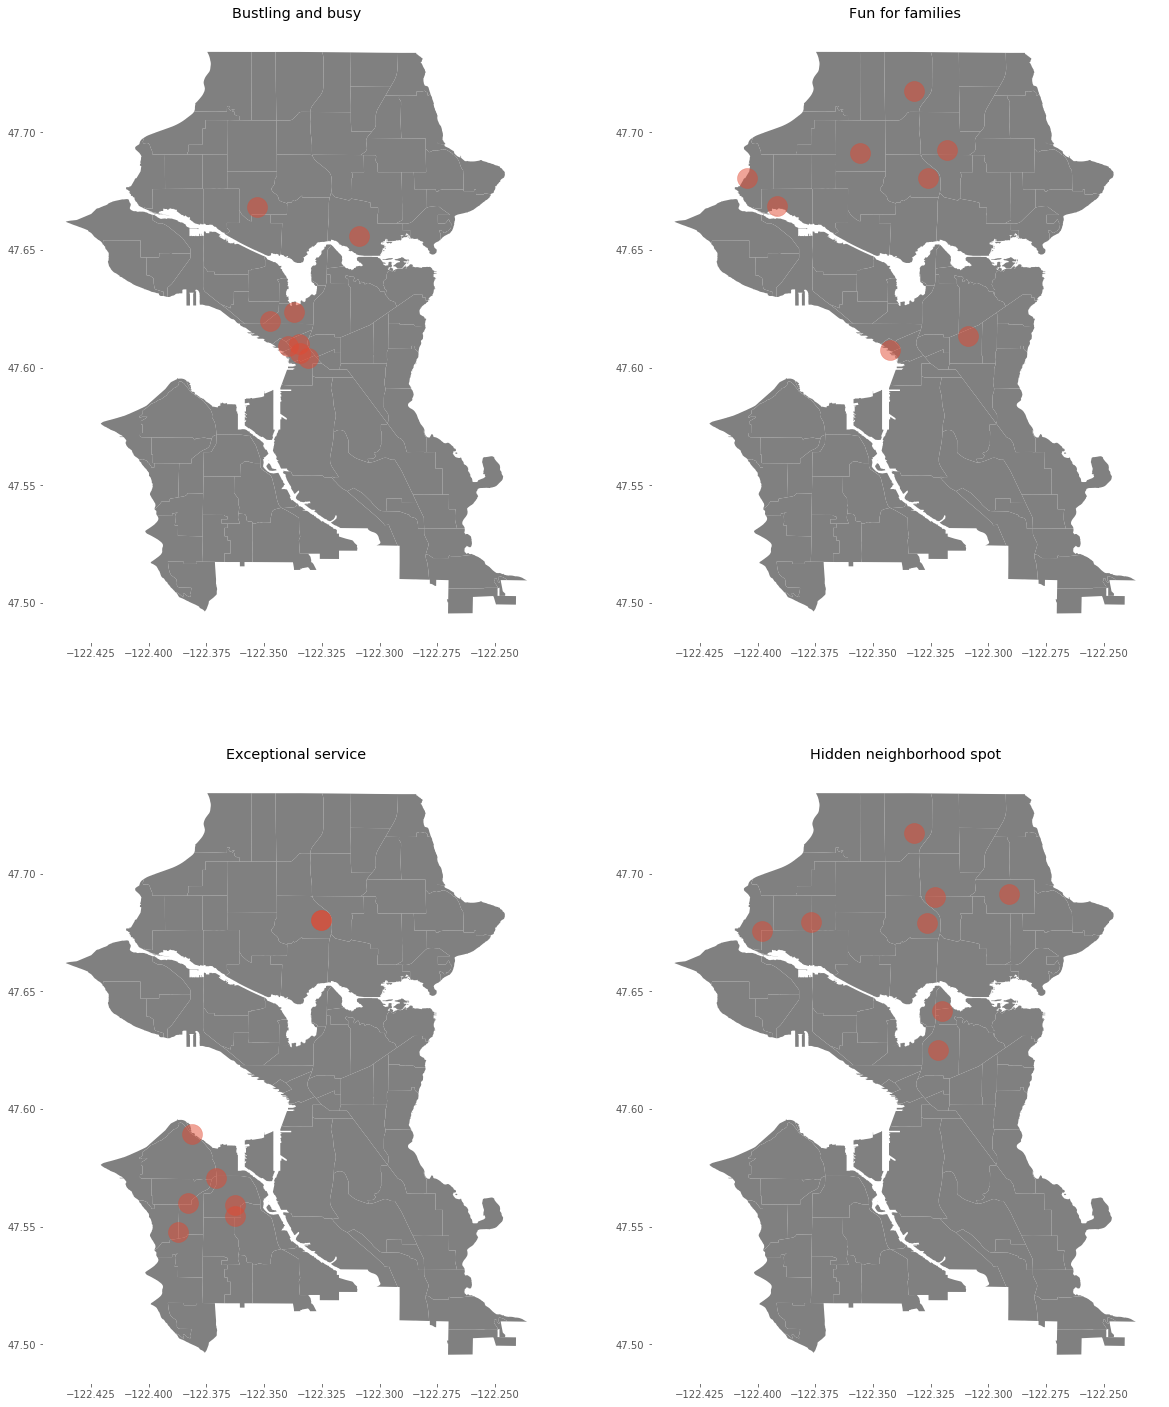

In [250]:
fig, axs = plt.subplots(2,2, figsize=(20,25))
features = ['Bustling and busy', 'Fun for families', 'Exceptional service', 'Hidden neighborhood spot']
for ax, feature in zip(axs.flatten(), features):
    seattle.plot(ax=ax, color='gray')
    perc = 98
    df_over_perc = mapped_df[mapped_df[feature] > np.percentile(mapped_df[feature], perc)]
    ax.scatter(df_over_perc['lng'], df_over_perc['lat'], s=400, alpha=0.5)
    ax.set_facecolor('white')
    ax.set_title(feature)

In [222]:
np.percentile?

In [224]:
np.percentile(df_over_mean['Fun for families'], 75)

0.11953076964660321

In [58]:
seattle_shops = gpd.tools.sjoin(geo_seattle_points, seattle, how='right', op='intersects')

In [64]:
sjoin?

Object `sjoin` not found.


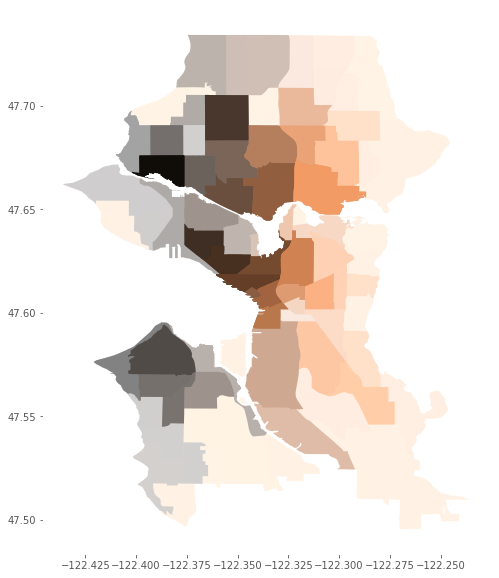

In [165]:
#How caffeinated a neighborhood is
fig, ax = plt.subplots(figsize=(8,10))
seattle_shops.plot(ax=ax, cmap='copper', alpha=0.2)
ax.set_facecolor('white')


In [90]:
features = ['Fun for families',
       'Nice for studying and working', 'Lovely ambiance',
       'Hidden neighborhood spot', 'Tasty pastries', 'Nightlife',
       'Exceptional service', 'High end coffee', 'Breakfast bites',
       'Quick in and out', 'Perfect for people watching', 'Cozy and comfy',
       'Lunch and snacks', 'Bustling and busy']

In [98]:
X = mapped_df[['Fun for families',
       'Nice for studying and working', 'Lovely ambiance',
       'Hidden neighborhood spot']]

In [99]:
pcd = PCA(2).fit(X.values)
shops_reduced = np.dot(X.values, pcd.components_.T)

In [100]:
labels = X.apply(lambda row: np.argmax(row.values), axis=1)

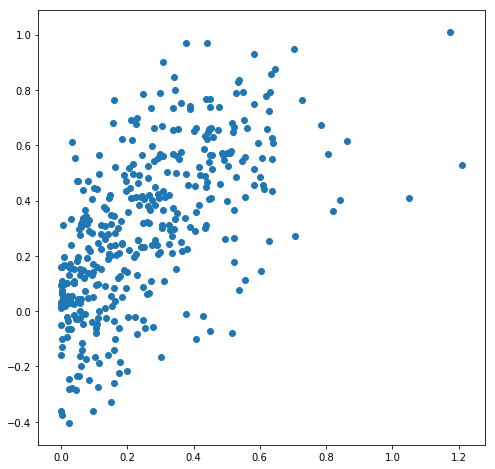

In [102]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(shops_reduced[:, 0], shops_reducted[:, 1])